In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from matplotlib.pyplot import pie, axis, show
from IPython.display import display, HTML

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

ImportError: No module named seaborn

In [3]:
!pip install networkx

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Load dataset

In [2]:
staff = pd.read_pickle('staff')
unitsS1 = pd.read_pickle('unitsS1')
unitsS2 = pd.read_pickle('unitsS2')
unitsOLE = pd.read_pickle('unitsOLE')
unitsHonors = pd.read_pickle('unitsHonors')

,code,coordinator,description,level,load,coordload
0,GEOS1001,Hubble,"Earth, Environment and Society",0,100,5.00
1,GEOS2111,Pritchard,Natural Hazards: A GIS Approach,1,100,5.00
2,GEOS2123,Pritchard,The Geograhy of Cities and Regions,1,100,5.00
3,GEOS2114,Wyman,"Volcanoes, Hot Rocks and Minerals",1,100,5.00
4,GEOS2115,Muller,"Oceans, Coasts and Climate Change",1,100,5.00
5,ENVI3111,Gillespie,Environmental Law and Ethics,2,100,5.00
6,GEOS3101,Rey,Earth Structure and Evolution,2,100,5.00
7,GEOS3009,Webster,Coastal Environments and Processes,2,100,5.00
8,GEOG3888,Penny,Integrated Geographical Practice Interdiscplin...,2,100,5.00
9,GEOL3888,Wyman,Economic Geology Interdiscplinary Project,2,100,5.00


# Definitions

In [3]:
def getStaff(name=None,plot=False,staff=staff,unitsS1=unitsS1,unitsS2=unitsS2,
             unitsOLE=unitsOLE,unitsHonors=unitsHonors):
    
    viewstaff = staff[staff['name']==name]
    listunits = viewstaff['units'].values[0]
    listperc = viewstaff['perc'].values[0]
    position = viewstaff['position'].values[0]
    
    sumload = 0.
    staffdata = pd.DataFrame(columns=['name','position','code','lvl','load','weight',
                                      'cumload','semester','coordinator'])
    for k in range(len(listunits)):
        if len(unitsS1[unitsS1['code']==listunits[k]])>0:
#         if len(unitsS1[unitsS1['code'].str.contains(pat = listunits[k])])>0: #==listunits[k]])>0:
            dd = unitsS1[unitsS1['code']==listunits[k]]
            listsemester = 'S.1'
        
        if len(unitsS2[unitsS2['code']==listunits[k]])>0:
            dd = unitsS2[unitsS2['code']==listunits[k]]
            listsemester = 'S.2'    

        if len(unitsOLE[unitsOLE['code']==listunits[k]])>0:
            dd = unitsOLE[unitsOLE['code']==listunits[k]]
            listsemester = 'OLE'

#         if len(unitsHonors[unitsHonors['code']==listunits[k]])>0:
#             dd = unitsHonors[unitsHonors['code']==listunits[k]]
#             listsemester = 'Hon'

        listlevel = dd['level'].values[0]
        listcoordinator = dd['coordinator'].values[0]
        sumload += (listperc[k]*dd['load'].values[0]/100.)/100.
        weight = (listperc[k]*dd['load'].values[0]/100.)/100.
        staffdata = staffdata.append({'name':name,'position':position,'code':listunits[k], 
                                      'lvl': listlevel,'load': listperc[k],'weight':weight,
                                      'cumload':sumload,'semester':listsemester,
                                      'coordinator':listcoordinator}, 
                                      ignore_index=True)
    if plot:
        fig, ax = plt.subplots(figsize=(6,4), ncols=2, nrows=1,
                               gridspec_kw = {'width_ratios':[2, 5]})
        g0 = sns.countplot(x='semester', data=staffdata, ax=ax[0], palette='Blues')
        g0.set_xticklabels(g0.get_xticklabels(),rotation=30)
        sns.despine()

        g1 = sns.barplot(x='code', y='load', data=staffdata, 
                         ax=ax[1], palette='RdBu_r')
        g1.set_xticklabels(g1.get_xticklabels(),rotation=30)
        plt.show()
    
    return staffdata

In [4]:
def plotStaffGraph(df=None,name=None):
    
    G = nx.from_pandas_edgelist(df, 'name', 'code', ['weight'])
    pos = nx.circular_layout(G)

    edges = G.edges()
    weights = [G[u][v]['weight']*5. for u,v in edges]

    plt.figure(1,figsize=(7,4)) 
    
    nx.draw_networkx_nodes(G,pos,
                           node_color='k',
                           node_size=4200)
    
    nx.draw_networkx_nodes(G,pos,
                           node_color='#A0CBE2',
                           node_size=4000)
    
    nx.draw_networkx_nodes(G,pos,nodelist=[name],
                           node_color='k',
                           node_size=5200)
    
    nx.draw_networkx_nodes(G,pos,nodelist=[name],
                           node_color='r',
                           node_size=5000)

    labels = nx.get_edge_attributes(G,'weight')

    nx.draw_networkx_edges(G,pos,
            width=weights, edge_cmap=plt.cm.Blues, with_labels=True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw_networkx_labels(G,pos,font_size=11)
    plt.ylim(-1.5,1.5)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return

# Single staff allocation

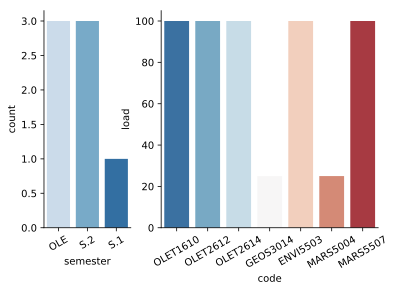

,name,position,code,lvl,load,weight,cumload,semester,coordinator
0,Bruce,Permanent,OLET1610,0,100,0.20,0.20,OLE,Bruce
1,Bruce,Permanent,OLET2612,1,100,0.20,0.40,OLE,Bruce
2,Bruce,Permanent,OLET2614,1,100,0.20,0.60,OLE,Bruce
3,Bruce,Permanent,GEOS3014,2,25,0.25,0.85,S.2,Bruce
4,Bruce,Permanent,ENVI5503,3,100,1.00,1.85,S.2,Neilson
5,Bruce,Permanent,MARS5004,3,25,0.25,2.10,S.2,Vila-Concejo
6,Bruce,Permanent,MARS5507,3,100,0.15,2.25,S.1,Bruce


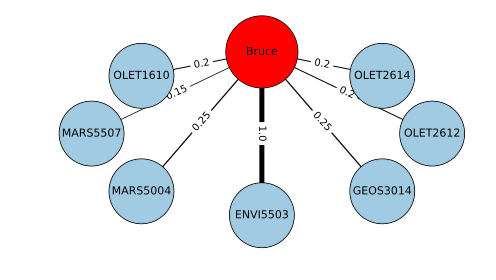

In [5]:
name = 'Bruce'
df = getStaff(name,plot=True)
display(HTML(df.to_html()))
plotStaffGraph(df,name)

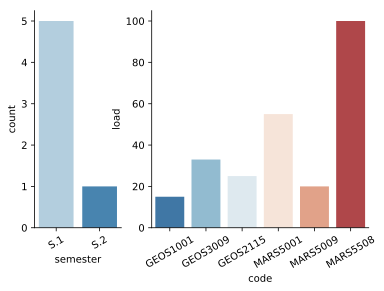

,name,position,code,lvl,load,weight,cumload,semester,coordinator
0,Vila-Concejo,Permanent,GEOS1001,0,15,0.15,0.15,S.1,Hubble
1,Vila-Concejo,Permanent,GEOS3009,2,33,0.33,0.48,S.1,Webster
2,Vila-Concejo,Permanent,GEOS2115,1,25,0.25,0.73,S.1,Muller
3,Vila-Concejo,Permanent,MARS5001,3,55,0.55,1.28,S.1,Vila-Concejo
4,Vila-Concejo,Permanent,MARS5009,3,20,0.20,1.48,S.1,Vila-Concejo
5,Vila-Concejo,Permanent,MARS5508,3,100,0.15,1.63,S.2,Vila-Concejo


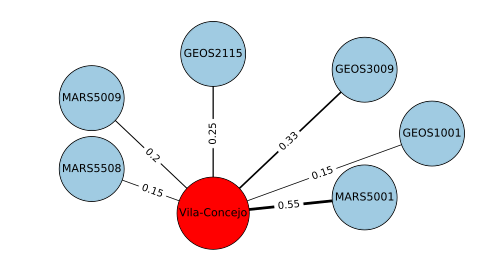

In [6]:
name = 'Vila-Concejo'
df = getStaff(name,plot=True)
display(HTML(df.to_html()))
plotStaffGraph(df,name)

# All staff load

In [7]:
allstaff = pd.DataFrame(columns=['name','unit','weight'])
for k in range(len(staff)):
    name = staff['name'][k]
    df = getStaff(name,plot=False)
    for p in range(len(df)):
        allstaff = allstaff.append({'name':df['name'][p],'position':df['position'][p],'unit':df['semester'][p],
                                'weight':df['weight'][p]},ignore_index=True)
#display(HTML(allstaff.to_html()))

In [40]:
allstaff

,name,unit,weight,position
0,Bruce,OLE,0.200,Permanent
1,Bruce,OLE,0.200,Permanent
2,Bruce,OLE,0.200,Permanent
3,Bruce,S.2,0.250,Permanent
4,Bruce,S.2,1.000,Permanent
5,Bruce,S.2,0.250,Permanent
6,Bruce,S.1,0.150,Permanent
7,Clarke,S.1,0.400,Permanent
8,Clarke,S.2,0.400,Permanent
9,Chatzaras,S.2,0.500,Permanent


## Number of units taught over the year

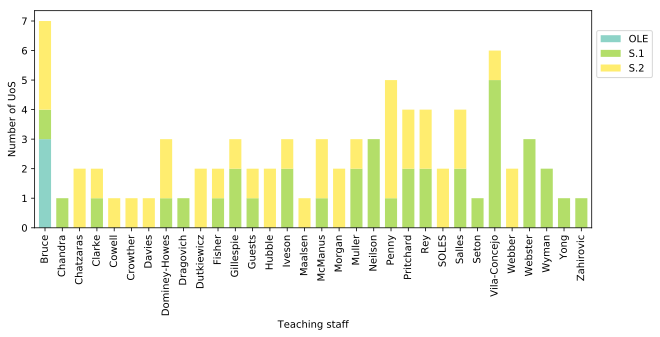

In [8]:
ax = allstaff.groupby('unit')['name'].value_counts().unstack(0).plot.bar(stacked=True, width=0.7, 
                                                                    colormap='Set3', figsize=(10,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Number of UoS")
plt.show()

Permanent versus contracted teaching

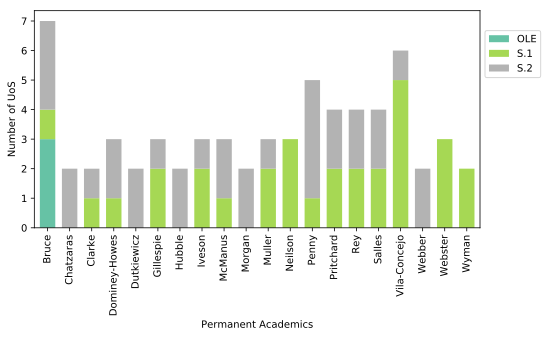

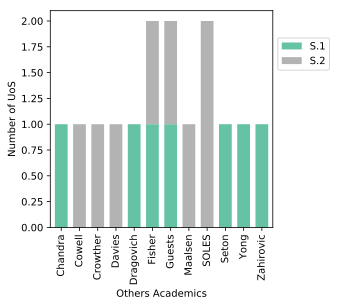

In [9]:
permanents = allstaff[allstaff['position']=='Permanent']
others = allstaff[allstaff['position']=='Other']

ax = permanents.groupby('unit')['name'].value_counts().unstack(0).plot.bar(stacked=True, width=0.7, 
                                                                    colormap='Set2', figsize=(8,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
ax.set_xlabel("Permanent Academics")
ax.set_ylabel("Number of UoS")
plt.show()

ax = others.groupby('unit')['name'].value_counts().unstack(0).plot.bar(stacked=True, width=0.7, 
                                                                    colormap='Set2', figsize=(4,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
ax.set_xlabel("Others Academics")
ax.set_ylabel("Number of UoS")
plt.show()

### Semester 1:

In [20]:
unitsS1['coordload'] = unitsS1['load']*0.05

tmp = unitsS1.groupby( ["coordinator"],as_index=False).agg({"coordload": "sum"})

coordload = tmp.groupby(["coordinator"],as_index=False).agg({"coordload": "sum"})
coordload['coordload'] = coordload['coordload']/100.
coordload = coordload.rename(columns = {'coordinator':'name','coordload':'weight'})

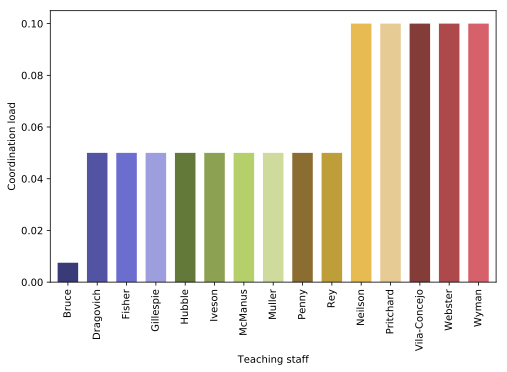

In [21]:
colors = np.zeros((40,4))
colors[:20] =  plt.cm.tab20b(np.arange(20))
colors[20:] =  plt.cm.tab20c(np.arange(20))

totcoord = coordload.groupby(['name'])['weight'].sum()
ax = totcoord.sort_values(ascending=True).plot.bar(figsize=(8,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Coordination load")
plt.show()

In [25]:
unitsS1

,code,coordinator,description,level,load,coordload
0,GEOS1001,Hubble,"Earth, Environment and Society",0,100,5.00
1,GEOS2111,Pritchard,Natural Hazards: A GIS Approach,1,100,5.00
2,GEOS2123,Pritchard,The Geograhy of Cities and Regions,1,100,5.00
3,GEOS2114,Wyman,"Volcanoes, Hot Rocks and Minerals",1,100,5.00
4,GEOS2115,Muller,"Oceans, Coasts and Climate Change",1,100,5.00
5,ENVI3111,Gillespie,Environmental Law and Ethics,2,100,5.00
6,GEOS3101,Rey,Earth Structure and Evolution,2,100,5.00
7,GEOS3009,Webster,Coastal Environments and Processes,2,100,5.00
8,GEOG3888,Penny,Integrated Geographical Practice Interdiscplin...,2,100,5.00
9,GEOL3888,Wyman,Economic Geology Interdiscplinary Project,2,100,5.00


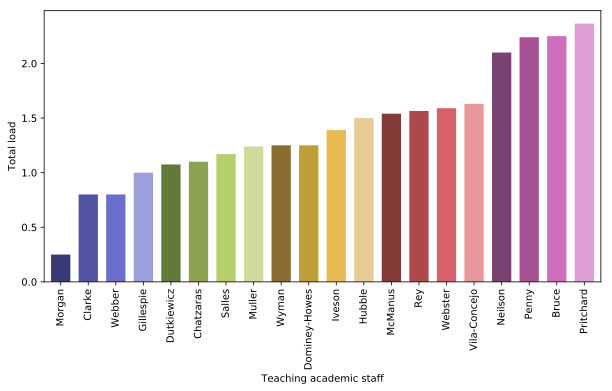

In [22]:
academicload = permanents.groupby(['name'],as_index=False).agg({"weight": "sum"})
acadload = academicload.groupby(['name'])['weight'].sum()

ax = acadload.sort_values(ascending=True).plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching academic staff")
ax.set_ylabel("Total load")
plt.show()

### Semester 2:

In [26]:
unitsS2['coordload'] = unitsS2['load']*0.05

tmp = unitsS2.groupby( ["coordinator"],as_index=False).agg({"coordload": "sum"})

coordload = tmp.groupby(["coordinator"],as_index=False).agg({"coordload": "sum"})
coordload['coordload'] = coordload['coordload']/100.
coordload = coordload.rename(columns = {'coordinator':'name','coordload':'weight'})

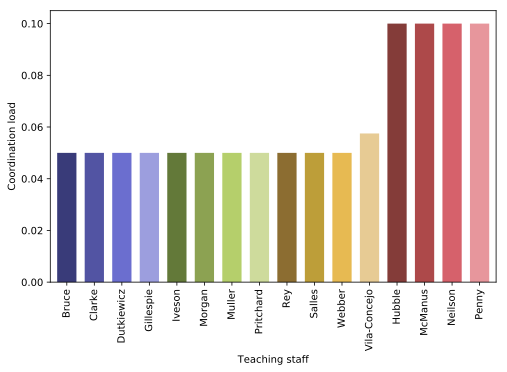

In [27]:
colors = np.zeros((40,4))
colors[:20] =  plt.cm.tab20b(np.arange(20))
colors[20:] =  plt.cm.tab20c(np.arange(20))

totcoord = coordload.groupby(['name'])['weight'].sum()
ax = totcoord.sort_values(ascending=True).plot.bar(figsize=(8,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Coordination load")
plt.show()

In [28]:
# teachingload = semester2.groupby(['name'],as_index=False).agg({"weight": "sum"})
# teachingload = teachingload.append(coordload,ignore_index=True)
# totload = teachingload.groupby(['name'])['weight'].sum()

# ax = totload.plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
# ax.set_xlabel("Teaching staff")
# ax.set_ylabel("Total load")
# plt.show()

# ax = totload.sort_values(ascending=True).plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
# ax.set_xlabel("Teaching staff")
# ax.set_ylabel("Total load")
# plt.show()

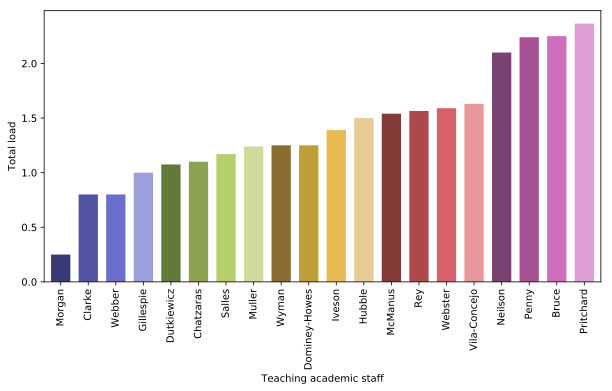

In [29]:
academicload = permanents.groupby(['name'],as_index=False).agg({"weight": "sum"})
acadload = academicload.groupby(['name'])['weight'].sum()

ax = acadload.sort_values(ascending=True).plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching academic staff")
ax.set_ylabel("Total load")
plt.show()

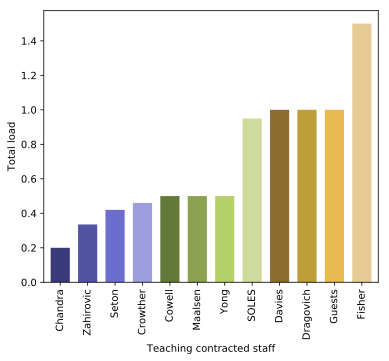

In [30]:
othersload = others.groupby(['name'],as_index=False).agg({"weight": "sum"})
othload = othersload.groupby(['name'])['weight'].sum()

ax = othload.sort_values(ascending=True).plot.bar(figsize=(6,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching contracted staff")
ax.set_ylabel("Total load")
plt.show()

## Add load for coordination

In [31]:
unitsS1['coordload'] = unitsS1['load']*0.05
unitsS2['coordload'] = unitsS2['load']*0.05
unitsOLE['coordload'] = unitsOLE['load']*0.05
unitsHonors['coordload'] = unitsHonors['load']*0.05

tmp1 = unitsS1.groupby(["coordinator"],as_index=False).agg({"coordload": "sum"})
tmp2 = unitsS2.groupby( ["coordinator"],as_index=False).agg({"coordload": "sum"})
tmp1 = tmp1.append(tmp2,ignore_index=True)
tmp2 = unitsOLE.groupby( ["coordinator"],as_index=False).agg({"coordload": "sum"})
tmp1 = tmp1.append(tmp2,ignore_index=True)
tmp2 = unitsHonors.groupby( ["coordinator"],as_index=False).agg({"coordload": "sum"})
tmp1 = tmp1.append(tmp2,ignore_index=True)

coordload = tmp1.groupby(["coordinator"],as_index=False).agg({"coordload": "sum"})
coordload['coordload'] = coordload['coordload']/100.
coordload = coordload.rename(columns = {'coordinator':'name','coordload':'weight'})

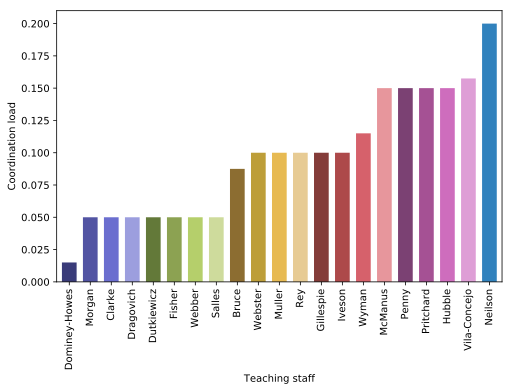

In [32]:
colors = np.zeros((40,4))
colors[:20] =  plt.cm.tab20b(np.arange(20))
colors[20:] =  plt.cm.tab20c(np.arange(20))

totcoord = coordload.groupby(['name'])['weight'].sum()
ax = totcoord.sort_values(ascending=True).plot.bar(figsize=(8,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Coordination load")
plt.show()

## Total staff teaching load

### All staff

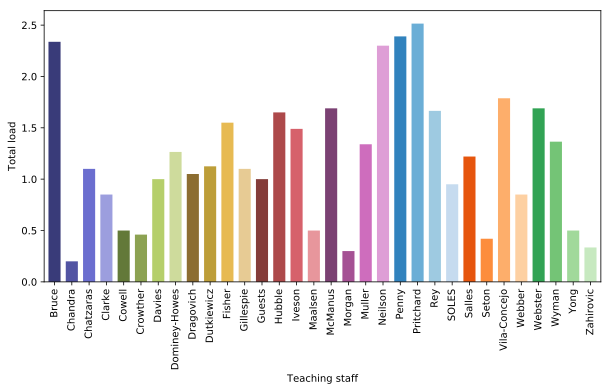

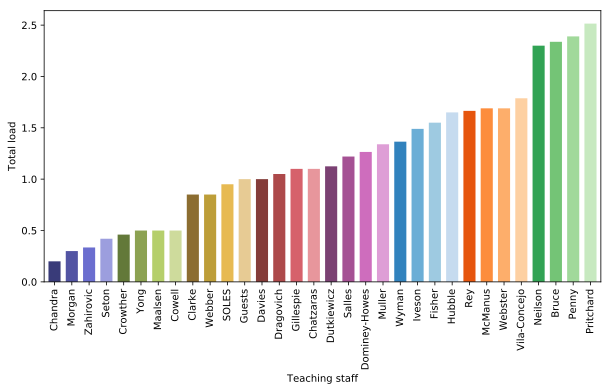

In [33]:
teachingload = allstaff.groupby(['name'],as_index=False).agg({"weight": "sum"})
teachingload = teachingload.append(coordload,ignore_index=True)
totload = teachingload.groupby(['name'])['weight'].sum()

ax = totload.plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Total load")
plt.show()

ax = totload.sort_values(ascending=True).plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching staff")
ax.set_ylabel("Total load")
plt.show()

### Permanent academics

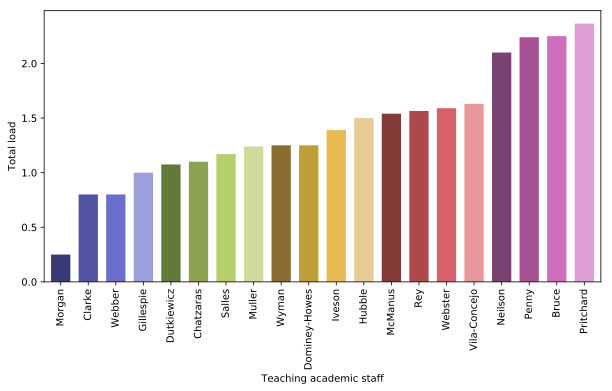

In [34]:
academicload = permanents.groupby(['name'],as_index=False).agg({"weight": "sum"})
acadload = academicload.groupby(['name'])['weight'].sum()

ax = acadload.sort_values(ascending=True).plot.bar(figsize=(10,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching academic staff")
ax.set_ylabel("Total load")
plt.show()

### Contracted academics

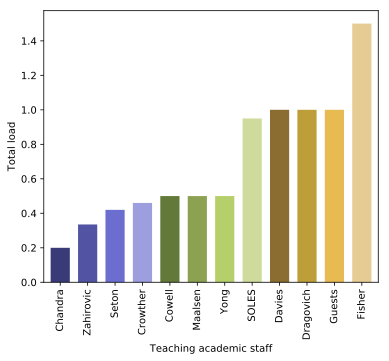

In [35]:
othersload = others.groupby(['name'],as_index=False).agg({"weight": "sum"})
othload = othersload.groupby(['name'])['weight'].sum()

ax = othload.sort_values(ascending=True).plot.bar(figsize=(6,5),legend=False, width=0.7, color=colors)
ax.set_xlabel("Teaching academic staff")
ax.set_ylabel("Total load")
plt.show()